# Phase 1 Notebook

This notebook analyzes the construction dataset provided and provides the solutions to the Goals/problems Provided

In [1]:
import matplotlib.pyplot as plt
import pandas as pd




In [2]:
dfForms = pd.read_csv("/workspaces/codespaces-jupyter/data/Construction_Data_PM_Forms_All_Projects.csv")

dfTasks = pd.read_csv("/workspaces/codespaces-jupyter/data/Construction_Data_PM_Tasks_All_Projects.csv")

In [3]:
dfForms.head()

,Ref,Status,Location,Name,Created,Type,Status Changed,Open Actions,Total Actions,Association,OverDue,Images,Comments,Documents,Project,Report Forms Status,Report Forms Group
0,F145185.4,Opened,01 Daily Site Diary>Site Management>JPC Projec...,1328 CM-SM-FRM-001 Site Diary,15/09/2020,Site Management,15/09/2020,0,0,NaN,False,True,False,False,1328,Open,Site Management
1,F1.495500,Open / Ongoing Works,02 Daily Work Plan>Site Management>JPC Project...,SM-FRM-SUB-101 Daily Work Plan,15/09/2020,Subcontractor Inspections,15/09/2020,0,0,NaN,False,False,False,False,1328,Open,Subcontractor
2,F1.495499,Open / Ongoing Works,02 Daily Work Plan>Site Management>JPC Project...,SM-FRM-SUB-101 Daily Work Plan,15/09/2020,Subcontractor Inspections,15/09/2020,0,0,NaN,False,False,False,False,1328,Open,Subcontractor
3,F1.495498,Open / Ongoing Works,02 Daily Work Plan>Site Management>JPC Project...,SM-FRM-SUB-101 Daily Work Plan,15/09/2020,Subcontractor Inspections,15/09/2020,0,0,NaN,False,False,False,False,1328,Open,Subcontractor
4,F1.495496,Open / Ongoing Works,02 Daily Work Plan>Site Management>JPC Project...,SM-FRM-SUB-101 Daily Work Plan,15/09/2020,Subcontractor Inspections,15/09/2020,0,0,NaN,False,False,False,False,1328,Open,Subcontractor


In [4]:
dfTasks.head()

,Ref,Status,Location,Description,Created,Target,Type,To Package,Status Changed,Association,OverDue,Images,Comments,Documents,Priority,Cause,project,Report Status,Task Group
0,T1.23963030,Open,JPC Project Management>EHS Management>01 Inspe...,task raised in incorrect location of this form...,14/09/2020,NaN,Safety Notice (Amber) - General Issue,Main Contractor,14/09/2020,FormAnswer,False,NaN,NaN,NaN,Behavioural Failure,JPC - Safety - Documentation,1328,Open,Safety
1,T116412.200,Closed,QC & BC(A)R>ITP 02 Architectural & M&E Service...,Metsec,14/09/2020,NaN,JPC - Progress Photo,Ceilings & Partitions,14/09/2020,NaN,False,True,False,False,NaN,NaN,1328,Closed,Site Management
2,T141663.27,EHS Good Observation,JPC Project Management>EHS Management>01 Inspe...,Good clear exclusion zones and access through ...,14/09/2020,NaN,Safety Notice (Green) - Good Observation,Main Contractor,14/09/2020,FormAnswer,False,True,False,False,NaN,JPC - Safety - Access,1328,Closed,Safety
3,T116412.199,Closed,QC & BC(A)R>ITP 02 Architectural & M&E Service...,RC walls,14/09/2020,NaN,JPC - Progress Photo,Precast Concrete,14/09/2020,NaN,False,True,False,False,NaN,NaN,1328,Closed,Site Management
4,T141663.26,EHS Good Observation,JPC Project Management>EHS Management>01 Inspe...,"block 02 working level has good housekeeping, ...",14/09/2020,NaN,Safety Notice (Green) - Good Observation,Precast Concrete,14/09/2020,FormAnswer,False,True,False,False,NaN,JPC - Safety - House Keeping,1328,Closed,Safety


In [5]:
 dfTasks.groupby(['OverDue'])['Ref'].count()


    


OverDue
False    11566
True       858
Name: Ref, dtype: int64

In [6]:
barChartData = pd.DataFrame(dfTasks.groupby(['Task Group', 'Report Status'])['Ref'].count())
barChartData

Ref
Task Group      Report Status      
Design Team     Closed          928
                Open            211
Quality         Closed          595
                Open            336
Safety          Closed         8297
                Open            587
Site Management Closed         1081
                Open            339

<Axes: xlabel='Task Group,Report Status'>

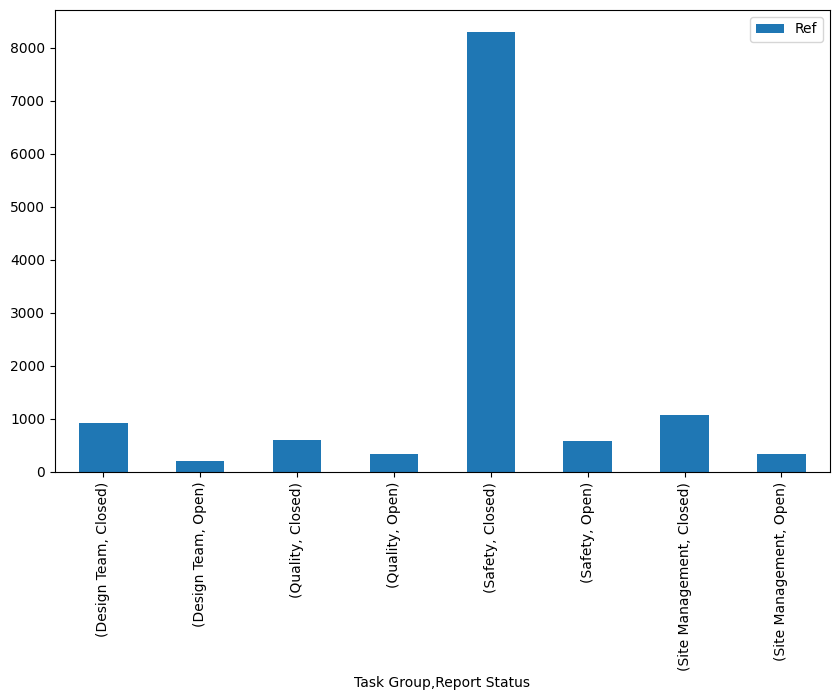

In [7]:
barChartData.plot(kind= "bar", stacked=True, figsize=(10, 6))


In [8]:
projectTasks = pd.DataFrame(dfTasks.groupby(['project','OverDue'])['Ref'].count())

In [9]:
projectTasksTotal = pd.DataFrame(dfTasks.groupby(['project'])['Ref'].count())

In [10]:
projectTasks

Ref
project OverDue      
1328    False    3546
        True      205
1329    False     452
        True       26
1330    False    3458
        True      226
1335    False    1059
        True      208
1338    False    1116
        True      192
1340    False     995
1343    False     381
1345    False     559
        True        1

In [11]:
projectTasksTotal.rename(columns={ 'Ref' : 'TotalTasks'})

,TotalTasks
project,
1328,3751
1329,478
1330,3684
1335,1267
1338,1308
1340,995
1343,381
1345,560


In [12]:
projectTasks

Ref
project OverDue      
1328    False    3546
        True      205
1329    False     452
        True       26
1330    False    3458
        True      226
1335    False    1059
        True      208
1338    False    1116
        True      192
1340    False     995
1343    False     381
1345    False     559
        True        1

In [13]:
overDueProjectTasks = pd.DataFrame(dfTasks.loc[dfTasks['OverDue']==True])

In [14]:
overDueProjectTasks

,Ref,Status,Location,Description,Created,Target,Type,To Package,Status Changed,Association,OverDue,Images,Comments,Documents,Priority,Cause,project,Report Status,Task Group
104,T116412.182,Works Complete / Resolved,QC & BC(A)R>ITP 02 Architectural & M&E Service...,Intumescent mastic to be installed.,08/09/2020,44088.0,JPC - Quality Defect (compliance),Ceilings & Partitions,10/09/2020,FormAnswer,True,True,False,False,NaN,JPC - Quality - Workmanship,1328,Open,Quality
110,T116412.181,Open / Ongoing Works,QC & BC(A)R>ITP 02 Architectural & M&E Service...,Rod caps and profiles to the end of trays to b...,07/09/2020,44087.0,JPC - Quality Snag (aesthetic),Mechanical,07/09/2020,FormAnswer,True,True,True,False,NaN,JPC - Quality - Materials,1328,Open,Quality
111,T84104.964,Works Complete / Resolved,QC & BC(A)R>ITP 01 Structural>Block 1>4th Floo...,Joint between precast walls is too big. Expand...,07/09/2020,44087.0,JPC - Quality Defect (compliance),Precast Concrete,10/09/2020,NaN,True,True,False,False,High,JPC - Quality - Workmanship,1328,Open,Quality
126,T116412.179,Open / Ongoing Works,QC & BC(A)R>ITP 02 Architectural & M&E Service...,Ply sheets to be removed.,03/09/2020,44083.0,JPC - Quality Snag (aesthetic),Concrete - Formwork,03/09/2020,NaN,True,True,False,False,NaN,JPC - Quality - Materials,1328,Open,Quality
127,T116412.178,Open / Ongoing Works,QC & BC(A)R>ITP 02 Architectural & M&E Service...,Illbruck tape to be installed around ducts,03/09/2020,44083.0,JPC - Quality Snag (aesthetic),Ceilings & Partitions,03/09/2020,NaN,True,True,True,False,NaN,JPC - Quality - Materials,1328,Open,Quality
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10290,T121362.4,JPC Sign Off,Quality Control & BC(A)R>ITP 02 Architectural>...,Petrol interceptor installed.,25/05/2020,43982.0,Design Team - BCAR Architectural,NaN,24/06/2020,NaN,True,True,False,False,NaN,NaN,1338,Closed,Design Team
10291,T121362.3,JPC Sign Off,Quality Control & BC(A)R>ITP 02 Architectural>...,Trench cages are welded per ESB requirements.,25/05/2020,43982.0,Design Team - BCAR Architectural,NaN,24/06/2020,NaN,True,True,False,False,NaN,NaN,1338,Closed,Design Team
10292,T121362.2,JPC Sign Off,Quality Control & BC(A)R>ITP 02 Architectural>...,Sample fair-faced block on flat internal leaf ...,25/05/2020,43982.0,Design Team - BCAR Architectural,Architect,24/06/2020,NaN,True,True,False,False,NaN,NaN,1338,Closed,Design Team
10293,T121362.1,JPC Sign Off,Quality Control & BC(A)R>ITP 02 Architectural>...,Rising wall progress at Substation.,25/05/2020,43982.0,Design Team - BCAR Architectural,Architect,24/06/2020,NaN,True,True,True,False,NaN,NaN,1338,Closed,Design Team


In [15]:
overDueProjectTasksbyProject = pd.DataFrame(overDueProjectTasks.groupby(['project'])['Ref'].count())

In [16]:
overDueProjectTasksbyProject.rename(columns={'Ref' : 'TasksOverdue'})

,TasksOverdue
project,
1328,205
1329,26
1330,226
1335,208
1338,192
1345,1


In [17]:
mergedProjectTasks = pd.merge(overDueProjectTasksbyProject, projectTasksTotal, on='project', how='outer')

In [18]:
mergedProjectTasks.rename(columns={'Ref_x' : 'OverDueTasks', 'Ref_y' : 'TotalTasks'})

,OverDueTasks,TotalTasks
project,,
1328,205.0,3751
1329,26.0,478
1330,226.0,3684
1335,208.0,1267
1338,192.0,1308
1345,1.0,560
1340,NaN,995
1343,NaN,381


In [19]:
mergedProjectTasks.keys()

Index(['Ref_x', 'Ref_y'], dtype='object')

In [20]:
mergedProjectTasks['Percent_Overdue'] = mergedProjectTasks['Ref_x'] / mergedProjectTasks['Ref_y']

In [21]:
mergedProjectTasks = mergedProjectTasks.dropna(subset=['Percent_Overdue'])

In [22]:
mergedProjectTasks

,Ref_x,Ref_y,Percent_Overdue
project,,,
1328,205.0,3751,0.054652
1329,26.0,478,0.054393
1330,226.0,3684,0.061346
1335,208.0,1267,0.164167
1338,192.0,1308,0.146789
1345,1.0,560,0.001786


In [23]:
projectPercentOver = pd.DataFrame(mergedProjectTasks['Percent_Overdue'])

In [24]:
projectPercentOver

,Percent_Overdue
project,
1328,0.054652
1329,0.054393
1330,0.061346
1335,0.164167
1338,0.146789
1345,0.001786


<Axes: xlabel='project'>

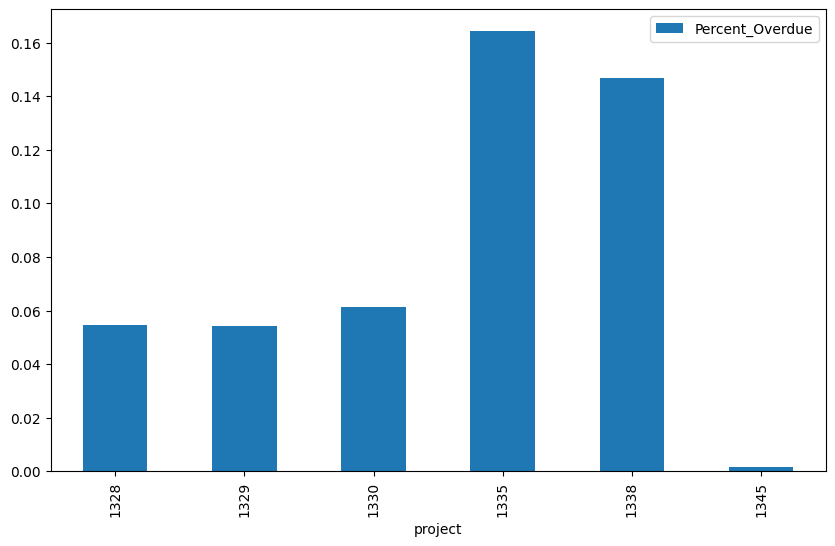

In [25]:
projectPercentOver.plot(kind= "bar", stacked=True, figsize=(10,6))

<Axes: xlabel='project,OverDue'>

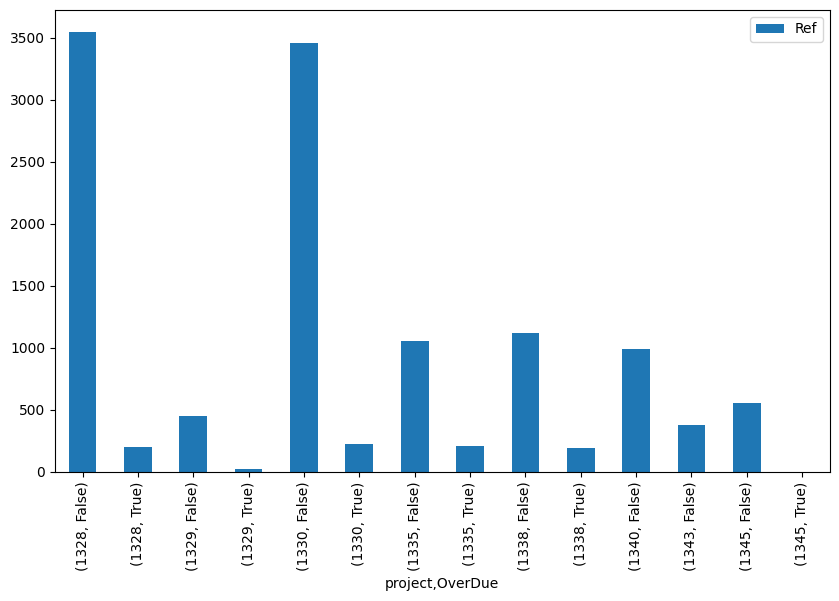

In [26]:
projectTasks.plot(kind= "bar", stacked=True, figsize=(10, 6))

In [27]:
dfForms.head()

,Ref,Status,Location,Name,Created,Type,Status Changed,Open Actions,Total Actions,Association,OverDue,Images,Comments,Documents,Project,Report Forms Status,Report Forms Group
0,F145185.4,Opened,01 Daily Site Diary>Site Management>JPC Projec...,1328 CM-SM-FRM-001 Site Diary,15/09/2020,Site Management,15/09/2020,0,0,NaN,False,True,False,False,1328,Open,Site Management
1,F1.495500,Open / Ongoing Works,02 Daily Work Plan>Site Management>JPC Project...,SM-FRM-SUB-101 Daily Work Plan,15/09/2020,Subcontractor Inspections,15/09/2020,0,0,NaN,False,False,False,False,1328,Open,Subcontractor
2,F1.495499,Open / Ongoing Works,02 Daily Work Plan>Site Management>JPC Project...,SM-FRM-SUB-101 Daily Work Plan,15/09/2020,Subcontractor Inspections,15/09/2020,0,0,NaN,False,False,False,False,1328,Open,Subcontractor
3,F1.495498,Open / Ongoing Works,02 Daily Work Plan>Site Management>JPC Project...,SM-FRM-SUB-101 Daily Work Plan,15/09/2020,Subcontractor Inspections,15/09/2020,0,0,NaN,False,False,False,False,1328,Open,Subcontractor
4,F1.495496,Open / Ongoing Works,02 Daily Work Plan>Site Management>JPC Project...,SM-FRM-SUB-101 Daily Work Plan,15/09/2020,Subcontractor Inspections,15/09/2020,0,0,NaN,False,False,False,False,1328,Open,Subcontractor


In [29]:
dfForms['Created'] = pd.to_datetime(dfForms['Created'], format= '%d/%m/%Y') 

In [30]:
from datetime import datetime

In [31]:
currentDate = pd.to_datetime('10/10/2020', format= '%d/%m/%Y')

In [32]:
dfForms['DaysFromCreation'] = (currentDate - dfForms['Created']).dt.days

In [33]:
dfForms.head()

,Ref,Status,Location,Name,Created,Type,Status Changed,Open Actions,Total Actions,Association,OverDue,Images,Comments,Documents,Project,Report Forms Status,Report Forms Group,DaysFromCreation
0,F145185.4,Opened,01 Daily Site Diary>Site Management>JPC Projec...,1328 CM-SM-FRM-001 Site Diary,2020-09-15,Site Management,15/09/2020,0,0,NaN,False,True,False,False,1328,Open,Site Management,25
1,F1.495500,Open / Ongoing Works,02 Daily Work Plan>Site Management>JPC Project...,SM-FRM-SUB-101 Daily Work Plan,2020-09-15,Subcontractor Inspections,15/09/2020,0,0,NaN,False,False,False,False,1328,Open,Subcontractor,25
2,F1.495499,Open / Ongoing Works,02 Daily Work Plan>Site Management>JPC Project...,SM-FRM-SUB-101 Daily Work Plan,2020-09-15,Subcontractor Inspections,15/09/2020,0,0,NaN,False,False,False,False,1328,Open,Subcontractor,25
3,F1.495498,Open / Ongoing Works,02 Daily Work Plan>Site Management>JPC Project...,SM-FRM-SUB-101 Daily Work Plan,2020-09-15,Subcontractor Inspections,15/09/2020,0,0,NaN,False,False,False,False,1328,Open,Subcontractor,25
4,F1.495496,Open / Ongoing Works,02 Daily Work Plan>Site Management>JPC Project...,SM-FRM-SUB-101 Daily Work Plan,2020-09-15,Subcontractor Inspections,15/09/2020,0,0,NaN,False,False,False,False,1328,Open,Subcontractor,25


In [34]:
dfFormsOpen =dfForms.loc[dfForms['Report Forms Status']== 'Open']

In [35]:
dfFormsOpen

,Ref,Status,Location,Name,Created,Type,Status Changed,Open Actions,Total Actions,Association,OverDue,Images,Comments,Documents,Project,Report Forms Status,Report Forms Group,DaysFromCreation
0,F145185.4,Opened,01 Daily Site Diary>Site Management>JPC Projec...,1328 CM-SM-FRM-001 Site Diary,2020-09-15,Site Management,15/09/2020,0,0,NaN,False,True,False,False,1328,Open,Site Management,25
1,F1.495500,Open / Ongoing Works,02 Daily Work Plan>Site Management>JPC Project...,SM-FRM-SUB-101 Daily Work Plan,2020-09-15,Subcontractor Inspections,15/09/2020,0,0,NaN,False,False,False,False,1328,Open,Subcontractor,25
2,F1.495499,Open / Ongoing Works,02 Daily Work Plan>Site Management>JPC Project...,SM-FRM-SUB-101 Daily Work Plan,2020-09-15,Subcontractor Inspections,15/09/2020,0,0,NaN,False,False,False,False,1328,Open,Subcontractor,25
3,F1.495498,Open / Ongoing Works,02 Daily Work Plan>Site Management>JPC Project...,SM-FRM-SUB-101 Daily Work Plan,2020-09-15,Subcontractor Inspections,15/09/2020,0,0,NaN,False,False,False,False,1328,Open,Subcontractor,25
4,F1.495496,Open / Ongoing Works,02 Daily Work Plan>Site Management>JPC Project...,SM-FRM-SUB-101 Daily Work Plan,2020-09-15,Subcontractor Inspections,15/09/2020,0,0,NaN,False,False,False,False,1328,Open,Subcontractor,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10139,F129825.44,Works Complete / Resolved,ITP 01 Structural>Quality Control & BC(A)R,QM-CL-CS-103 Excavation Inspection,2020-06-30,Quality 01 Structural,16/07/2020,0,0,NaN,False,True,True,False,1345,Open,Quality,102
10144,F129825.40,Works Complete / Resolved,ITP 03 Civil Works>Quality Control & BC(A)R,QM-CL-CS-102 Demolition Inspection,2020-06-29,Quality 01 Structural,16/07/2020,0,0,NaN,False,True,True,False,1345,Open,Quality,103
10145,F129825.39,Works Complete / Resolved,ITP 03 Civil Works>Quality Control & BC(A)R,QM-CL-CS-103 Excavation Inspection,2020-06-29,Quality 01 Structural,16/07/2020,0,0,NaN,False,True,True,False,1345,Open,Quality,103
10146,F129825.38,Works Complete / Resolved,ITP 01 Structural>Quality Control & BC(A)R,JPC-QC-CL-110 Concrete Inspection (Pre/During/...,2020-06-29,Quality 01 Structural,16/07/2020,0,0,NaN,False,True,True,True,1345,Open,Quality,103


In [36]:
meanDaysOpenForms = pd.DataFrame(dfFormsOpen.groupby(['Project'])['DaysFromCreation'].mean())
meanDaysOpenForms

,DaysFromCreation
Project,
1328,132.759828
1329,104.134615
1330,145.372396
1335,150.200000
1338,95.790476
1340,49.911111
1343,75.968750
1345,75.968750


In [37]:
meanDaysOpenGroup = pd.DataFrame(dfFormsOpen.groupby(['Report Forms Group'])['DaysFromCreation'].mean())
meanDaysOpenGroup

,DaysFromCreation
Report Forms Group,
Design Team,150.263158
Quality,135.464908
Safety,112.589928
Site Management,119.589744
Subcontractor,44.385417


In [38]:
type = pd.DataFrame(dfFormsOpen.groupby(['Type'], as_index=False)['Ref'].count())
type

,Type,Ref
0,00 Project Management,4
1,BU - Head Office,12
2,Design Team / BC(A)R,57
3,Inspection,6
4,Permits,2
5,Quality 00 General,589
6,Quality 01 Structural,391
7,Quality 02 Architectural,959
8,Quality 03 Civil,25
9,Quality 04 MEP Services,39


<Axes: xlabel='Type'>

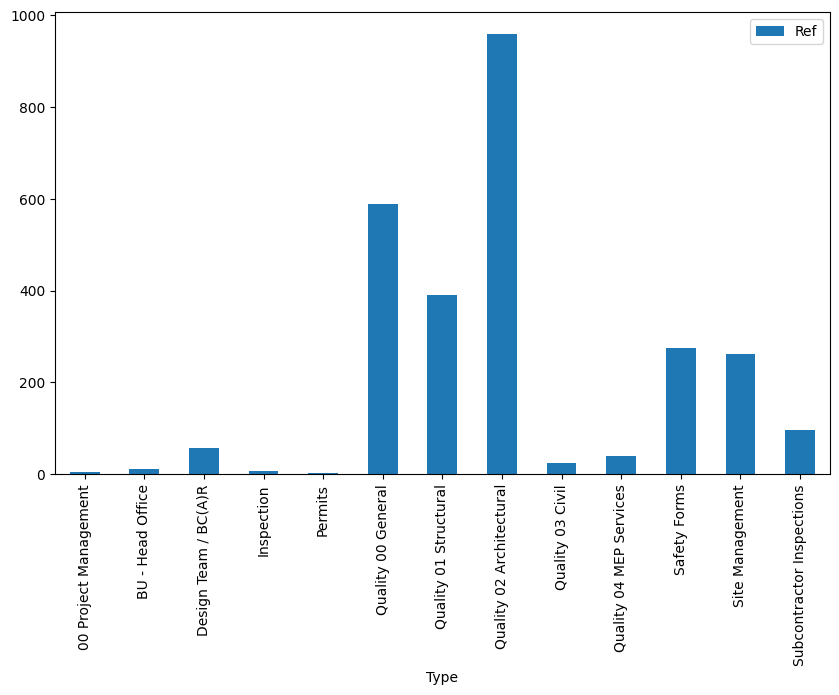

In [39]:
Types = type['Type']
type.plot(x='Type', kind= "bar", stacked=True, figsize=(10, 6))

In [ ]:
plt.figure(figsize=(16,8), dpi= 150)

<Figure size 2400x1200 with 0 Axes>

<Figure size 2400x1200 with 0 Axes>

In [40]:
meanDaysOpenGroup

,DaysFromCreation
Report Forms Group,
Design Team,150.263158
Quality,135.464908
Safety,112.589928
Site Management,119.589744
Subcontractor,44.385417


In [47]:
FormsCreatedByTime = pd.DataFrame(dfFormsOpen.groupby(['Created'], as_index=False)['Ref'].count())

In [49]:
FormsCreatedByTime

,Ref
Created,
2019-05-07,1
2019-05-08,1
2019-06-19,2
2019-07-16,1
2019-07-26,2
...,...
2020-09-12,1
2020-09-13,3
2020-09-14,65


In [61]:
DesignTeam = dfFormsOpen.loc[dfFormsOpen['Report Forms Group']== 'Design Team']

In [62]:
Quality = dfFormsOpen.loc[dfFormsOpen['Report Forms Group']== 'Quality']
Safety = dfFormsOpen.loc[dfFormsOpen['Report Forms Group']== 'Safety']
Site_Management = dfFormsOpen.loc[dfFormsOpen['Report Forms Group']== 'Site Management']
SubContractor = dfFormsOpen.loc[dfFormsOpen['Report Forms Group']== 'Subcontractor']

In [64]:
DesignAgg = DesignTeam.groupby(['Created'], as_index=False)['Ref'].count()
QualityAgg = Quality.groupby(['Created'], as_index=False)['Ref'].count()
Site_ManagementAgg = Site_Management.groupby(['Created'], as_index=False)['Ref'].count()
SafetyAgg = Safety.groupby(['Created'], as_index=False)['Ref'].count()
SubContractorAgg =SubContractor.groupby(['Created'], as_index=False)['Ref'].count()

,Ref
Created,
2019-05-07,1
2019-05-08,1
2019-06-19,2
2019-07-16,1
2019-07-26,2
...,...
2020-09-12,1
2020-09-13,3
2020-09-14,65


In [73]:
FormsCreatedByTime

,Ref
Created,
2019-05-07,1
2019-05-08,1
2019-06-19,2
2019-07-16,1
2019-07-26,2
...,...
2020-09-12,1
2020-09-13,3
2020-09-14,65


In [74]:

DesignAgg.set_index('Created', inplace=True)

In [77]:
QualityAgg.set_index('Created', inplace=True)

In [78]:
Site_ManagementAgg.set_index('Created', inplace=True)

In [79]:
SafetyAgg.set_index('Created', inplace=True)

In [80]:
SubContractorAgg.set_index('Created', inplace=True)

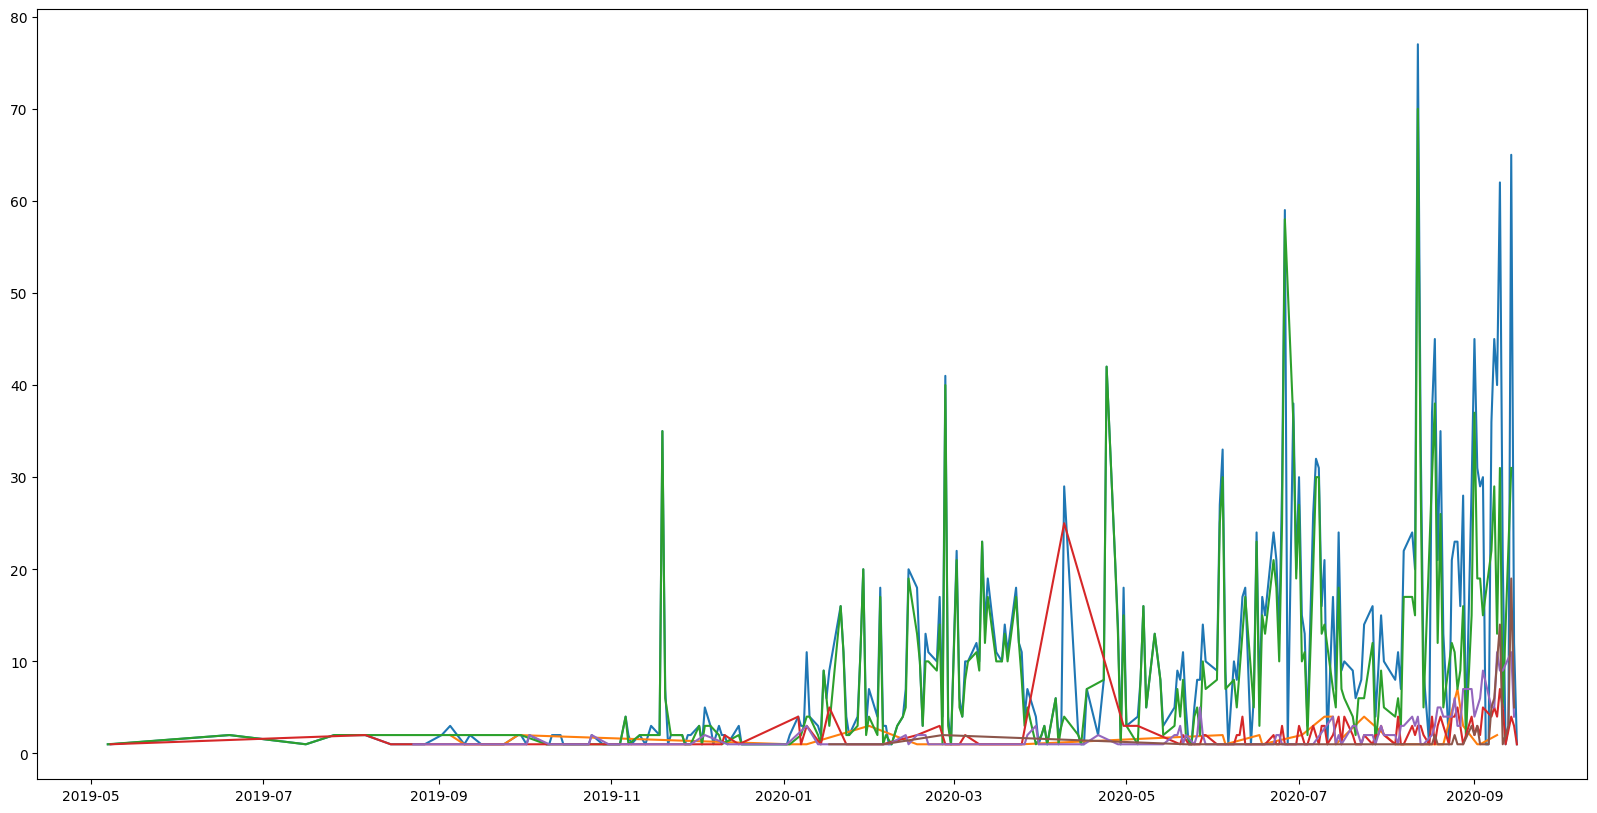

In [83]:
plt.figure(figsize=(20,10))


plt.plot( FormsCreatedByTime.index, FormsCreatedByTime['Ref'], label = 'Total_Num_Forms_Created', linestyle = '-')
plt.plot( DesignAgg.index,DesignAgg['Ref'], label = 'Design Forms Created', linestyle = '-' )
plt.plot(QualityAgg.index, QualityAgg['Ref'], label = 'Quality Forms Created', linestyle = '-')
plt.plot(Site_ManagementAgg.index, Site_ManagementAgg['Ref'], label = 'Site Mngmt Forms Created', linestyle = '-')
plt.plot(SafetyAgg.index, SafetyAgg['Ref'], label = 'Safety Forms Created', linestyle = '-')
plt.plot(SubContractorAgg.index, SubContractorAgg['Ref'], label = 'SubContractor Forms Created', linestyle = '-')